In [44]:
import os
import math
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats


In [26]:
data = pd.read_csv("/Users/hsiao-chunhung/Downloads/fraud_detector_data.csv")

/var/folders/z7/yk43scxd16x0n2387j0sp2bh0000gn/T/ipykernel_2882/2726724155.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,25,26,27,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/hsiao-chunhung/Downloads/fraud_detector_data.csv")


In [27]:
# 1 Uncerstanding the data

In [28]:
data.head()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Phishing-Annotation,SocEngg-Annotation,Label,Split
0,maildir,arnold-j,<17334447.1075857585446.JavaMail.evans@thyme>,"Thu, 16 Nov 2000 09:30:00 -0800 (PST)",msagel@home.com,jarnold@enron.com,Status,1.0,text/plain; charset=ANSI_X3.4-1968,7bit,...,False,False,External,18.0,False,False,0.0,0.0,0,Train
1,maildir,arnold-j,<19171686.1075857585034.JavaMail.evans@thyme>,"Fri, 8 Dec 2000 05:05:00 -0800 (PST)",slafontaine@globalp.com,john.arnold@enron.com,re:summer inverses,1.0,text/plain; charset=us-ascii,7bit,...,False,False,External,4.0,True,False,0.0,0.0,0,Train
2,maildir,arnold-j,<29887033.1075857630725.JavaMail.evans@thyme>,"Tue, 15 May 2001 09:43:00 -0700 (PDT)",iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",The WTI Bullet swap contracts,1.0,text/plain; charset=us-ascii,7bit,...,False,False,External,3.0,True,False,0.0,0.0,0,Train
3,maildir,arnold-j,<2526360.1075857584903.JavaMail.evans@thyme>,"Mon, 11 Dec 2000 23:52:00 -0800 (PST)",klarnold@flash.net,john.arnold@enron.com,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,1.0,text/plain; charset=us-ascii,7bit,...,False,False,External,9.0,False,True,0.0,0.0,0,Train
4,maildir,arnold-j,<30102065.1075857630952.JavaMail.evans@thyme>,"Mon, 14 May 2001 23:59:00 -0700 (PDT)",soblander@carrfut.com,soblander@carrfut.com,daily charts and matrices as hot links 5/15,1.0,text/plain; charset=us-ascii,7bit,...,False,False,External,352.0,False,False,0.0,0.0,0,Train


In [29]:
data.tail()

,Folder-User,Folder-Name,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,POI-Present,Suspicious-Folders,Sender-Type,Unique-Mails-From-Sender,Low-Comm,Contains-Reply-Forwards,Phishing-Annotation,SocEngg-Annotation,Label,Split
475538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Gold Fraud
475539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Gold Fraud
475540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Gold Fraud
475541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Gold Fraud
475542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Gold Fraud


In [30]:
data.shape

(475543, 35)

In [31]:
data.describe()

,Unique-Mails-From-Sender,Phishing-Annotation,SocEngg-Annotation,Label
count,447417.000000,447417.000000,447417.000000,475543.000000
mean,979.691999,0.010637,0.000858,0.024105
std,1446.968908,0.102584,0.029284,0.153376
min,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000
50%,250.000000,0.000000,0.000000,0.000000
75%,1341.000000,0.000000,0.000000,0.000000
max,5486.000000,1.000000,1.000000,1.000000


In [32]:
data.columns

Index(['Folder-User', 'Folder-Name', 'Message-ID', 'Date', 'From', 'To',
       'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'Body', 'Cc', 'Bcc', 'Time', 'Attendees', 'Re', 'Source', 'Mail-ID',
       'POI-Present', 'Suspicious-Folders', 'Sender-Type',
       'Unique-Mails-From-Sender', 'Low-Comm', 'Contains-Reply-Forwards',
       'Phishing-Annotation', 'SocEngg-Annotation', 'Label', 'Split'],
      dtype='object')

In [33]:
data.nunique()

Folder-User                       1
Folder-Name                     150
Message-ID                   447417
Date                         221093
From                          20239
To                            58293
Subject                      158824
Mime-Version                      3
Content-Type                      3
Content-Transfer-Encoding         4
X-From                        27738
X-To                          72876
X-cc                          33493
X-bcc                           117
X-Folder                       5173
X-Origin                        260
X-FileName                      427
Body                         269298
Cc                            29529
Bcc                           29529
Time                              2
Attendees                         2
Re                                1
Source                            3
Mail-ID                      276118
POI-Present                       2
Suspicious-Folders                1
Sender-Type                 

In [34]:
data['Split'].unique()

array(['Train', 'Sanity', 'Gold Fraud'], dtype=object)

In [35]:
# Cleaning the data

In [36]:
data.isnull().sum()

Folder-User                   28126
Folder-Name                   28126
Message-ID                    28126
Date                          28126
From                          28126
To                            28126
Subject                       46146
Mime-Version                  28126
Content-Type                  28126
Content-Transfer-Encoding     28126
X-From                        28126
X-To                          36305
X-cc                         365906
X-bcc                        475366
X-Folder                      28126
X-Origin                      28126
X-FileName                    30816
Body                              0
Cc                            28126
Bcc                           28126
Time                          28126
Attendees                     28126
Re                            28126
Source                            0
Mail-ID                           0
POI-Present                   28126
Suspicious-Folders            28126
Sender-Type                 

In [46]:
fraudDetector = data[['Unique-Mails-From-Sender', 'Phishing-Annotation', 'SocEngg-Annotation', 'Label']].copy()

In [47]:
fraudDetector.head()

,Unique-Mails-From-Sender,Phishing-Annotation,SocEngg-Annotation,Label
0,18.0,0.0,0.0,0
1,4.0,0.0,0.0,0
2,3.0,0.0,0.0,0
3,9.0,0.0,0.0,0
4,352.0,0.0,0.0,0


In [48]:
# Relationship analysis

In [49]:
corelation = fraudDetector.corr()

<AxesSubplot: >

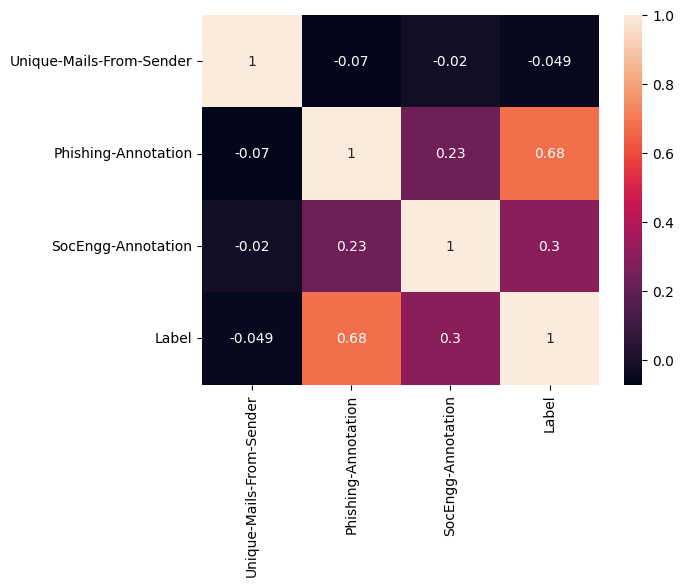

In [50]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

                                 Numeric Features Distribution                                  


/var/folders/z7/yk43scxd16x0n2387j0sp2bh0000gn/T/ipykernel_2882/886285833.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraudDetector[cols[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
/var/folders/z7/yk43scxd16x0n2387j0sp2bh0000gn/T/ipykernel_2882/886285833.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, pleas

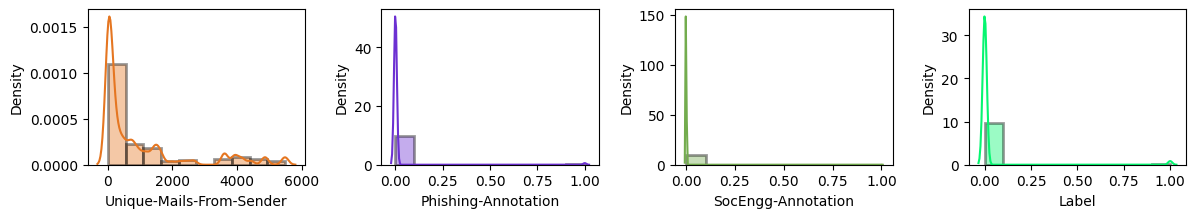

In [51]:
print('\033[1mNumeric Features Distribution'.center(100))

n = 5
cols = fraudDetector.columns.tolist()[0:]
n_col = len(cols)

clr=['r','g','b','g','b','r']

plt.figure(
    figsize=[15,4*math.ceil(n_col/n)])

for i in range(n_col):
    plt.subplot(math.ceil(n_col/3),n,i+1)
    sns.distplot(fraudDetector[cols[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))

plt.tight_layout()
plt.show()

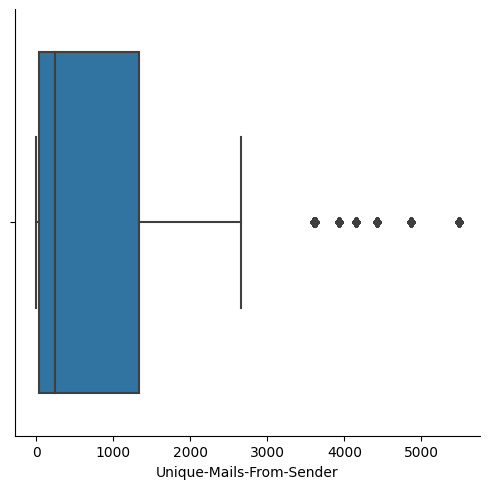

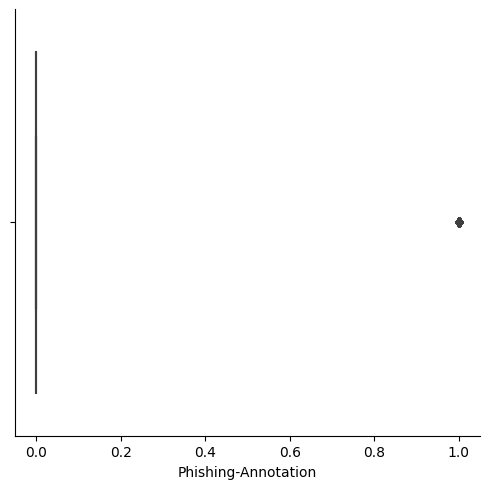

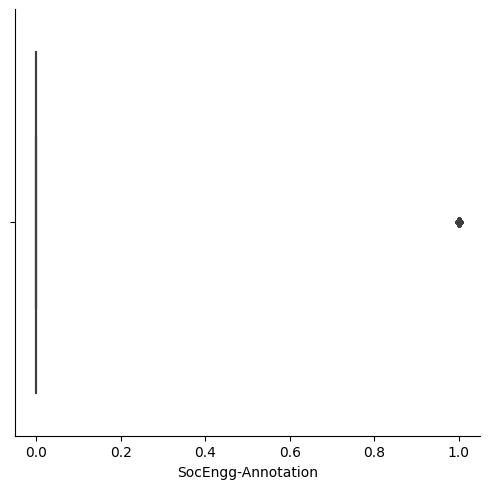

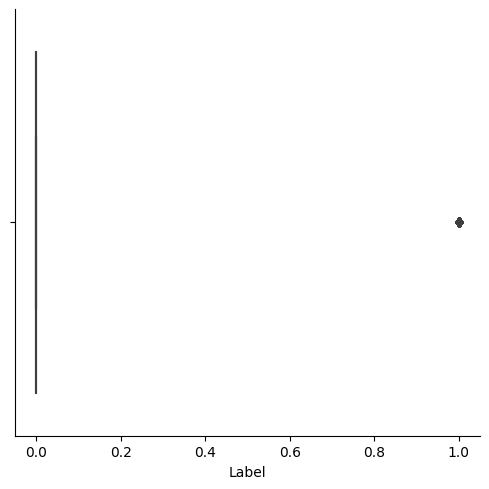

In [53]:
for i in fraudDetector.columns.tolist()[:]:
    sns.catplot(x = i, kind= 'box', data=fraudDetector)